In [23]:
import urllib
import requests
import pandas as pd
import json
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

# Analysis Report
## Chris Grant

## For my analysis report, I will be choosing option #1. I am choosing to correct the mistakes on my API Data Report. After reviewing the comments you left, I felt it was the best option. 

## The hypothesis I tested is that albums released during the summer months experience a higher average number of streams compared to tracks released in other seasons. Initially, my statistical hypothesis was not strongly supported by my theoretical. My new statistical hypothesis is that Spotify's API can help us prove that using the proper endpoints. Specifically, I will use the album and tracks endpoints to test my hypothesis. The variables I have been working with manipulate the data already retrieved from the Spotify API. For example, 'drake_album_response' stores the response from the Spotify API and will let the programmer know that the Spotify API is working correctly and has received a working input (a proper ID). 

## Below, I will begin loading in my initial report. The cell below is loading in our Spotify API into this Notebook and is giving us an access token. The API needs specific client keys which are loaded in as 'keys'.

In [24]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).\
                                   encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url,
                            data = data,
                            headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [25]:
keys = pd.read_csv("client.txt")

In [26]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


## Below, I am beginning to format the tracks and album endpoints with variables and then beginning to call the Spotify API and returning what it gives us as json.

In [27]:
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'
tracks_ep = 'https://api.spotify.com/v1/tracks'

In [28]:
def api_call(endpoint_url, api_header): 
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

## Below, I am creating a session header and formating it with the access token. I also am storing both Drake and Kendrick's album IDs as a variable so we can use it later. It is being checked with 'session_header' below it.

In [29]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}
drake_album_id = '5MS3MvWHJ3lOZPLiMxzOU6'
kendrick_album_id = '79ONNoS4M9tfIA1mYLBYVX'  

In [30]:
drake_album_response = api_call(ab_tracks_ep.format(drake_album_id) , session_header)
kendrick_album_response = api_call(ab_tracks_ep.format(kendrick_album_id) , session_header)

200
200


## Below, I am creating two dataframes using the data from the API reponse for both Drake and Kendrick's albums. With 'drake_track_ids', I am taking the track ID from the 'drake_album_df' dataframe and storing it as a string.

In [31]:
drake_album_df = pd.DataFrame(drake_album_response['items'])
kendrick_album_df = pd.DataFrame(kendrick_album_response['items'])

In [32]:
drake_track_ids= ','.join(drake_album_df['id'].to_list())
kendrick_track_ids= ','.join(kendrick_album_df['id'].to_list())

## I am going to create the first visual for my report with Drake's dataframe below. It is going to have three columns and will sort their values by popularity, in descending order. 

## This is where I wrangled my data for my report. I collected my data using the Spotify API, and stored it within the dataframes below for visualization. I put the numbers from Drake and Kendrick's albums in a dataframe and attempted to clean it up as best as possible by only getting the dataframe to provide us with relevant info. The name of the track on the album, the href or link to the song, and how popular it is out of a score of 100. Manipulating the data using a dataframe allowed me to pick and choose what information would support my hypothesis as well as give me a better idea of what 

In [33]:
drake_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(drake_track_ids), session_header)
kendrick_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(kendrick_track_ids), session_header)

200
200


In [34]:
drake_tracks_df = pd.DataFrame(drake_track_info['tracks'])
drake_data = drake_tracks_df[["name", "href", "popularity"]]
drakes_data_df = drake_tracks_df[["name", "href", "popularity"]].sort_values(by=["popularity"], ascending=[False])
drakes_data_df

,name,href,popularity
0,Rich Flex,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,75
5,Spin Bout U,https://api.spotify.com/v1/tracks/2ZL7WZcjuYKi...,74
6,Hours In Silence,https://api.spotify.com/v1/tracks/0sSRLXxknVTQ...,70
9,Pussy & Millions (feat. Travis Scott),https://api.spotify.com/v1/tracks/2KLwPaRDOB87...,70
2,On BS,https://api.spotify.com/v1/tracks/34tz0eDhGuFE...,69
4,Privileged Rappers,https://api.spotify.com/v1/tracks/7l2nxyx7IkBX...,68
8,Circo Loco,https://api.spotify.com/v1/tracks/7GeTsDIc5ykN...,67
1,Major Distribution,https://api.spotify.com/v1/tracks/46s57QULU02V...,65
10,Broke Boys,https://api.spotify.com/v1/tracks/45pUWUeEWGoS...,64
12,Jumbotron Shit Poppin,https://api.spotify.com/v1/tracks/2ZlABhxMMa43...,64


## I am going to do a different visualization of my hypotheses for both Kendrick and Drake's albums using matplotlib. I will be creating a scatterplot and filling it with the same data I wrangled from my initial report. I feel this scatter plot positively represents both my statistical and theoretical thesis, but is unable to go much further than the surface of those two hypotheses due to data limitations.

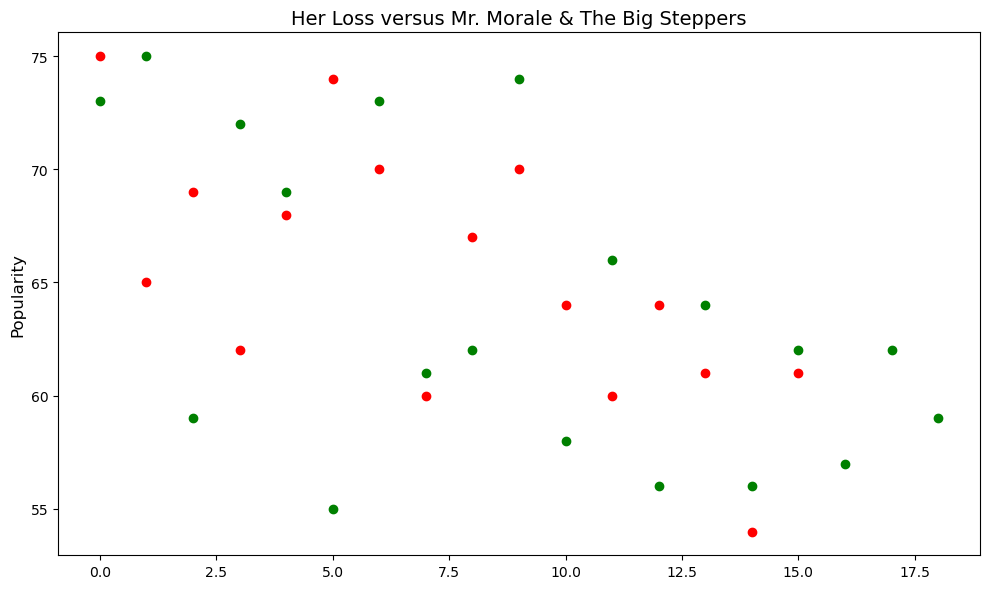

In [35]:
# Kendrick's data is being loaded in first
kendrick_tracks_df = pd.DataFrame(kendrick_track_info['tracks'])
kendrick_data = kendrick_tracks_df[["name", "href", "popularity"]]
kendricks_data_df = kendrick_tracks_df[["name", "href", "popularity"]].sort_values(by=["popularity"], ascending=[False])
kendricks_data_df

# Drake's data is being loaded below
drake_tracks_df = pd.DataFrame(drake_track_info['tracks'])
drake_data = drake_tracks_df[["name", "href", "popularity"]]
drakes_data_df = drake_tracks_df[["name", "href", "popularity"]].sort_values(by=["popularity"], ascending=[False])
drakes_data_df

# Scatter plot to better visualize popularity vs. track index. Much more readable than a bar chart for example.
plt.figure(figsize=(10,6))
plt.scatter(kendricks_data_df.index, kendricks_data_df['popularity'], color='green')
plt.scatter(drakes_data_df.index, drakes_data_df['popularity'], color='red')

# Adding labels and title
plt.ylabel('Popularity', fontsize=12)
plt.title('Her Loss versus Mr. Morale & The Big Steppers' , fontsize=14)

# Shows plot
plt.tight_layout()
plt.show()

## After reviewing my initial findings under a new light, I have found that the limitations found in my data could represent a few things. The data limitations I ended up finding after reviewing this report again would be falling on the Spotify API, Spotify itself and my hypothesis itself. The main limitations from the Spotify API include a lack of user data from the Spotify API. These demographics could be helpful because we could narrow down who and when people would be listening to a specific album, and this could help prove my hypothesis. This is a large privacy issue for Spotify's paying users, so it makes sense why they are not available. Another limitation coming from Spotify's API is that the data it is giving users is current data. This makes it more difficult to accurately quantify things like a song's popularity score because a song will go down in popularity over time. I found I also have concluded I did not have too strong of hypotheses for the initial report. The holes in my hypothesis I found were that geographical bias plays a part in the accuracy of my findings. In the Northern Hemisphere, our summer is at a completely different time than the Southern Hemisphere. Additionally, the popularity metric from Spotify changes over time and does not give an exact number of streams. Lastly, choosing arguably the two most popular artists from a genre may not have made it easy to compare a lot of the two artists' album performances.

## Overall, I feel as if this hypothesis could have been represented more strongly with a different API, or a different dataset. I would take a deeper dive into the limitations of my dataset and also the datasets I choose to compare. For the next steps on this specific report, I would think to try to recreate these visualizations with different datasets. I would choose two different artists from different genres and lower popularity in an effort to yield a different result on my hypothesis.